In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn


In [52]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [53]:
def plot(X, y, model= None):
        if model is not None:
            plt.figure(figsize=(16, 8))
            plt.subplot(1, 2, 1)
            plt.title("Train")
            plot_decision_boundary(model, X, y)
        else:
            plt.figure(figsize=(12,12))
            plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

tensor([[ -2.5875,  10.2082],
        [  0.6495,   8.3507],
        [-10.3111,   9.7671],
        [-10.0456,   6.6503],
        [ -8.1433,   6.5844]]) tensor([0, 0, 5, 3, 3])


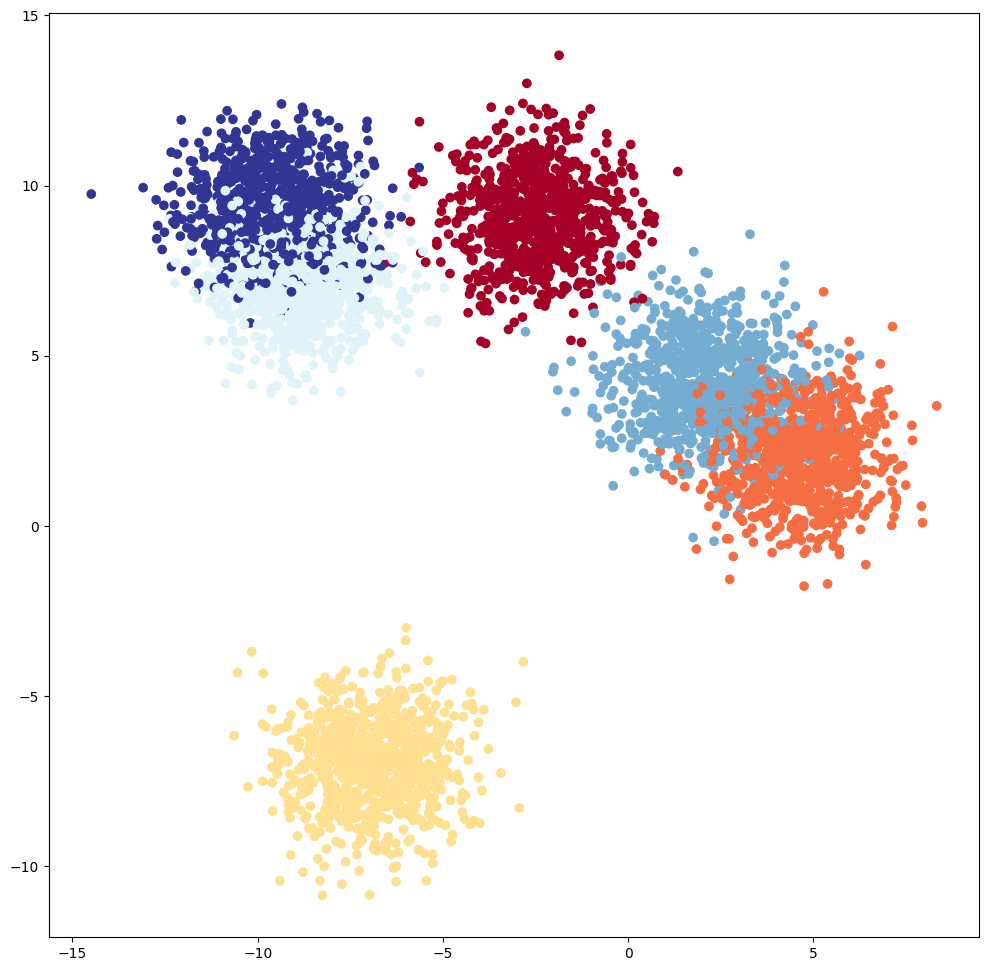

In [54]:
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

NUM_CLASSES = 6
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=5000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.25,
    random_state=RANDOM_SEED
)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

X_train, X_test, y_train, y_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

plot(X_blob, y_blob)

In [55]:
class BlobModel(nn.Module):
    def __init__(self, input_feature, output_feature, hiden_units):

        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feature, out_features=hiden_units),
            nn.ReLU(),
            nn.Linear(in_features=hiden_units, out_features=hiden_units),
            nn.ReLU(),
            nn.Linear(in_features=hiden_units, out_features=output_feature)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_0 = BlobModel(input_feature=NUM_FEATURES, output_feature=NUM_CLASSES, hiden_units=8)
model_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=6, bias=True)
  )
)

In [56]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.08)

In [57]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [58]:
torch.manual_seed(42)

epochs = 4000



for epoch in range(epochs):
    
    model_0.train()

    y_logits = model_0(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():

      test_logits = model_0(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"epoch: {epoch}    |    train loss: {loss} , train accuracy: {acc}    |    test loss: {test_loss} , test accuracy: {test_acc}")

epoch: 0    |    train loss: 1.790063738822937 , train accuracy: 16.325    |    test loss: 1.6760642528533936 , test accuracy: 18.0
epoch: 10    |    train loss: 1.2946919202804565 , train accuracy: 36.425000000000004    |    test loss: 1.2454081773757935 , test accuracy: 46.0
epoch: 20    |    train loss: 0.9296256899833679 , train accuracy: 76.775    |    test loss: 0.9172232151031494 , test accuracy: 73.0
epoch: 30    |    train loss: 0.769585132598877 , train accuracy: 78.125    |    test loss: 0.7660555839538574 , test accuracy: 75.2
epoch: 40    |    train loss: 0.6786388754844666 , train accuracy: 79.125    |    test loss: 0.6798911094665527 , test accuracy: 76.7
epoch: 50    |    train loss: 0.6191959381103516 , train accuracy: 79.60000000000001    |    test loss: 0.6238808035850525 , test accuracy: 77.10000000000001
epoch: 60    |    train loss: 0.5757279396057129 , train accuracy: 79.975    |    test loss: 0.5831872820854187 , test accuracy: 77.4
epoch: 70    |    train loss:

In [59]:
class BlobModelNoneLinear(nn.Module):
    def __init__(self, input_feature, output_feature, hiden_units):

        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_feature, out_features=hiden_units),
            nn.ReLU(),
            nn.Linear(in_features=hiden_units, out_features=hiden_units),
            nn.ReLU(),
            nn.Linear(in_features=hiden_units, out_features=output_feature)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_1 = BlobModelNoneLinear(input_feature=NUM_FEATURES, output_feature=NUM_CLASSES, hiden_units=8)
model_1

BlobModelNoneLinear(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=6, bias=True)
  )
)

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [61]:
torch.manual_seed(42)

epochs = 4000

for epoch in range(epochs):
    
    model_0.train()

    y_logits = model_1(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():

      test_logits = model_1(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"epoch: {epoch}    |    train loss: {loss} , train accuracy: {acc}    |    test loss: {test_loss} , test accuracy: {test_acc}")

epoch: 0    |    train loss: 1.790063738822937 , train accuracy: 16.325    |    test loss: 1.661092758178711 , test accuracy: 18.0
epoch: 10    |    train loss: 1.1756600141525269 , train accuracy: 61.75000000000001    |    test loss: 1.1297637224197388 , test accuracy: 68.8
epoch: 20    |    train loss: 0.837844729423523 , train accuracy: 77.64999999999999    |    test loss: 0.827143669128418 , test accuracy: 74.2
epoch: 30    |    train loss: 0.6980272531509399 , train accuracy: 79.125    |    test loss: 0.6963842511177063 , test accuracy: 76.2
epoch: 40    |    train loss: 0.6193919777870178 , train accuracy: 79.60000000000001    |    test loss: 0.6229381561279297 , test accuracy: 77.10000000000001
epoch: 50    |    train loss: 0.5665706992149353 , train accuracy: 80.22500000000001    |    test loss: 0.5739115476608276 , test accuracy: 77.2
epoch: 60    |    train loss: 0.5267269611358643 , train accuracy: 83.3    |    test loss: 0.5389115810394287 , test accuracy: 76.8
epoch: 70   

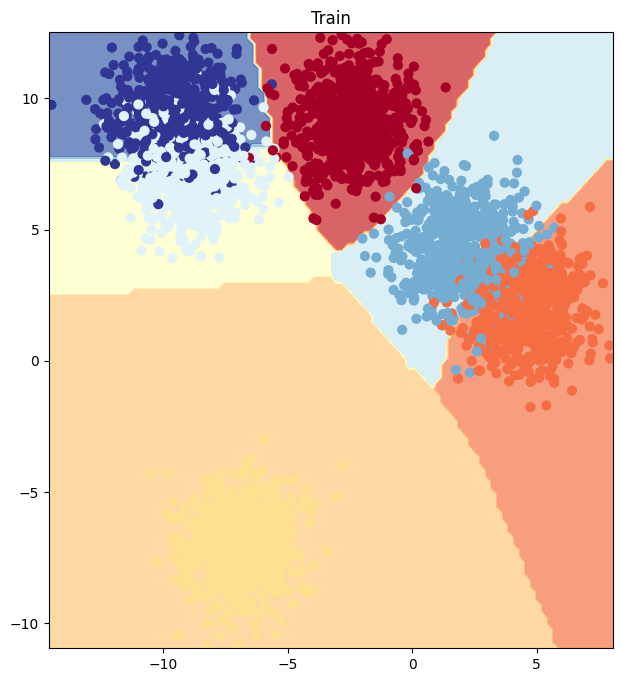

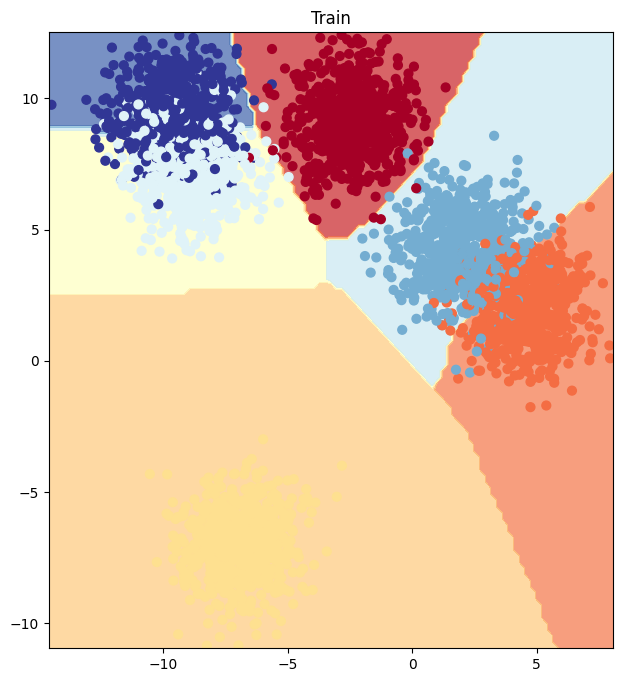

In [62]:
plot(X_train, y_train, model_1)
plot(X_train, y_train, model_0)